<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220522_hotel_%ED%95%98%EB%8A%94%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

새로 배운거
1. 모드 함수 정의
2. ranger 패키지

# 1. 데이터 로드 및 간단 구조 확인

In [ ]:
#function ClickConnect(){
#    console.log("코랩 연결 끊김 방지"); 
#    document.querySelector("colab-toolbar-button#connect").click() 
#}
#setInterval(ClickConnect, 60 * 1000)

In [ ]:
install.packages(c("DataExplorer","fastDummies","tidyquant","tidyverse")) #전처리
install.packages("superml") #label encoder
install.packages(c("kernlab","e1071","caret","pROC")) #modeling+tunnig
install.packages("magrittr") # pipe

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘globals’, ‘later’, ‘listenv’, ‘parallelly’, ‘gower’, ‘hardhat’, ‘ipred’, ‘furrr’, ‘crosstalk’, ‘promises’, ‘warp’, ‘BH’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘RcppRoll’, ‘future’, ‘plyr’, ‘Rcpp’, ‘htmlwidgets’, ‘igraph’, ‘quadprog’, ‘zoo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘tsfeatures’, ‘reshape2’, ‘gridExtra’, ‘networkD3’, ‘PerformanceAnalytics’, ‘quantmod’, ‘lazyeval’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘TTR’, ‘xts’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Metrics’


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘proxy’, ‘foreach’, ‘ModelMetrics’


Installing

In [ ]:
install.packages("pacman")
pacman::p_load( "DataExplorer","fastDummies","tidyquant","tidyverse","superml","kernlab","e1071","caret", "pROC","magrittr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
system("gdown --id 17bke1KhCQFDjVToiNybtczlKqkWmWlvg")

In [ ]:
df=read.csv("hotel.csv")

In [ ]:
str(df); summary(df)

'data.frame':	119390 obs. of  17 variables:
 $ hotel_type                    : chr  "Resort Hotel" "Resort Hotel" "Resort Hotel" "Resort Hotel" ...
 $ is_canceled                   : int  0 0 0 0 0 0 0 0 1 1 ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : chr  "BB" "BB" "BB" "BB" ...
 $ is_repeated_guest             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ previous_cancellations        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ previous_bookings_not_canceled: int  0 0 0 0 0 0 0 0 0 0 ...
 $ reserved_room_type            : chr  "C" "C" "A" "A" ...
 $ assigned_room_type            : chr  "C" "C" "C" "A" ...
 $ booking_changes 

  hotel_type         is_canceled       lead_time   stays_in_weekend_nights
 Length:119390      Min.   :0.0000   Min.   :  0   Min.   : 0.0000        
 Class :character   1st Qu.:0.0000   1st Qu.: 18   1st Qu.: 0.0000        
 Mode  :character   Median :0.0000   Median : 69   Median : 1.0000        
                    Mean   :0.3704   Mean   :104   Mean   : 0.9276        
                    3rd Qu.:1.0000   3rd Qu.:160   3rd Qu.: 2.0000        
                    Max.   :1.0000   Max.   :737   Max.   :19.0000        
                                                                          
 stays_in_week_nights     adults          children           babies         
 Min.   : 0.0         Min.   : 0.000   Min.   : 0.0000   Min.   : 0.000000  
 1st Qu.: 1.0         1st Qu.: 2.000   1st Qu.: 0.0000   1st Qu.: 0.000000  
 Median : 2.0         Median : 2.000   Median : 0.0000   Median : 0.000000  
 Mean   : 2.5         Mean   : 1.856   Mean   : 0.1039   Mean   : 0.007949  
 3rd Qu.: 3.0  

In [ ]:
#팩터변경
#df %<>% mutate(is_canceled = as.factor(is_canceled)) 
for (j in c(1:2,9,13:14)){
  df[,j]<-as.factor(df[,j])
}


1. 범주형 4, 연속형 12, 타겟1은 이진분류
2. 분포를 더 살펴 보아야 알겠지만, 변수 명세서를 봤을 때 어른의 수(adults), 취소되지 않은 예약 횟수, 호텔 평균 가격(adr) 등 포텐셜 아웃라이어로 예상되는 값이 존재한다<br> ⏩문제에 해당된 전처리만 한다면 아웃라이어에 민감하지 않은 모델을 선택해야 한다.
3. children에 NA 4개 존재
4. 스케일링 필요

# 2. Basic EDA

1) 인트로

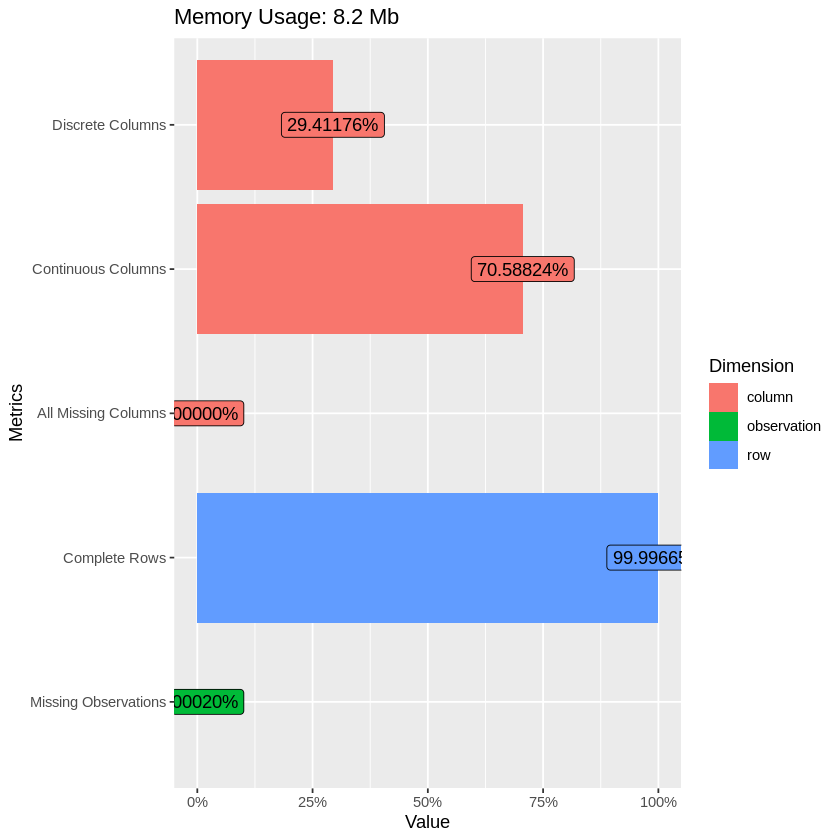

In [ ]:
plot_intro(df)

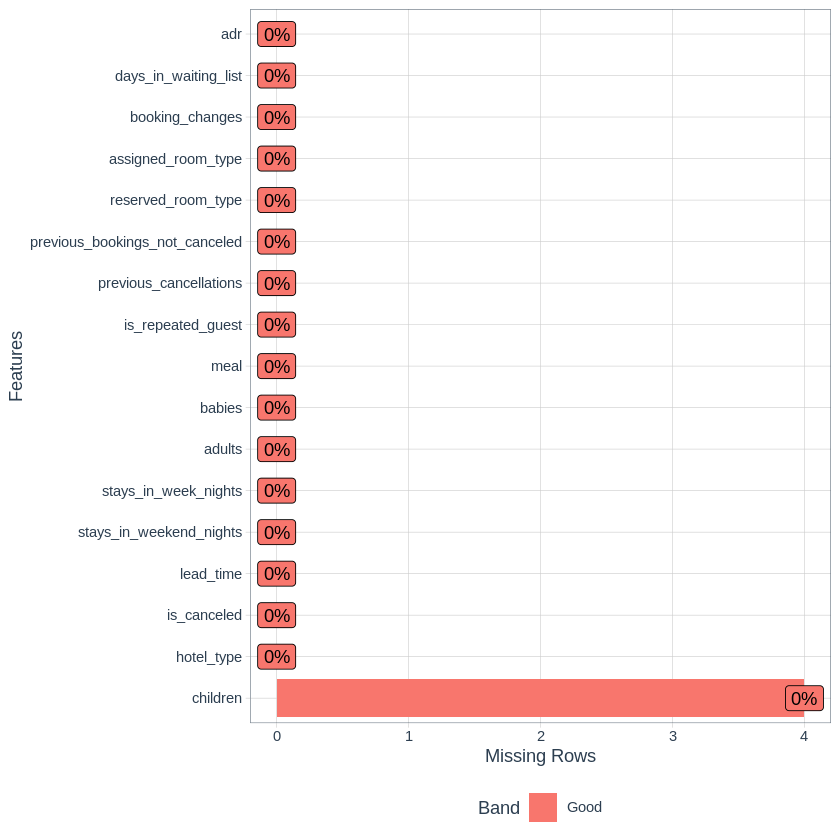

In [ ]:
plot_missing(df, ggtheme = theme_tq())

* 앞서 확인한 것과 같음

2) 범주형

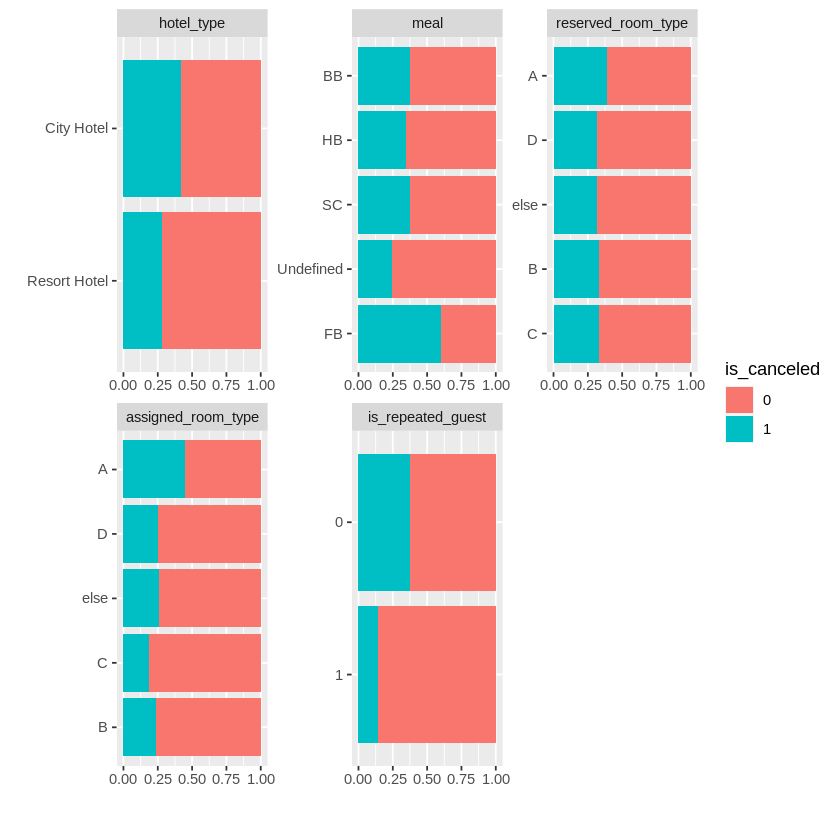

In [ ]:
plot_bar(df, by ='is_canceled') 

- 예약 객실 유형(reserved_room_type)과 배정된 객실 유형(assigned_room_type)은 타겟에 대한 분포가 비슷하다
- ~~A / D+ELSE/ C+D로 범주 재조정 할 예정 왜냐하면 그냥 삼차원 그래프 만들어 보고 싶어서~~
- city hotel이 resort hotel과 비교하여 취소율이 높음
- meal에선 FB가 눈에 띄게 취소율이 높음 FB가 뭔지 궁금함
- 방 타잎은 A가 제일 높고
- 재방문한 손님은 취소율이 낮다.

#### ~~범주 재조정한거(안씀)~~

In [ ]:
df %<>% mutate(reserved_room_type = case_when(reserved_room_type=='A' ~ 'A',
                                    reserved_room_type == 'D' ~ 'D_else',
                                    reserved_room_type == 'else' ~ 'D_else',
                                    reserved_room_type=='B' ~ 'B_C',
                                    reserved_room_type=='C' ~ 'B_C' ,
                                    ) %>%as.factor) 

In [ ]:
df %<>% mutate(assigned_room_type = case_when(assigned_room_type=='A' ~ 'A',
                                    assigned_room_type == 'D' ~ 'D_else',
                                    assigned_room_type == 'else' ~ 'D_else',
                                    assigned_room_type=='B' ~ 'B_C',
                                    assigned_room_type=='C' ~ 'B_C' ,
                                    ) %>%as.factor) 

In [ ]:
str(df) # 확인

'data.frame':	119390 obs. of  17 variables:
 $ hotel_type                    : Factor w/ 2 levels "City Hotel","Resort Hotel": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : Factor w/ 5 levels "BB","FB","HB",..: 1 1 1 1 1 1 1 2 1 3 ...
 $ is_repeated_guest             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ previous_cancellations        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ previous_bookings_not_canceled: int  0 0 0 0 0 0 0 0 0 0 ...
 $ reserved_room_type            : Factor w/ 3 levels "A","B_C","D_else": 2 2 1 

In [ ]:
#write.csv(df,"hotel2.csv", row.names=FALSE)  # 일단저장 gui에서해봄

In [ ]:
install.packages("rgl") ;library(rgl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”


In [ ]:
mycolors <- c('royalblue1', 'darkcyan', 'oldlace')
df$color <- mycolors[ as.numeric(df$reserved_room_type) ]

In [ ]:
df$children<-ifelse(is.na(df$children),0, df$children) #일단지움

In [ ]:
#샘플링
ind<-sample(1:nrow(df), nrow(df)*0.009, replace=F)
df_sample<-df[ind,]  

In [ ]:
setupKnitr()
plot3d( 
  x=df_sample$`adults`, y=df_sample$`children`, z=df_sample$`babies`, 
  col =df_sample$color, 
  type = 's', 
  radius = .1,
  xlab="adults", ylab="children", zlab="babies")   #GUI에서는됨
 
rglwidget()

## 다시 여기부터

3) 연속형

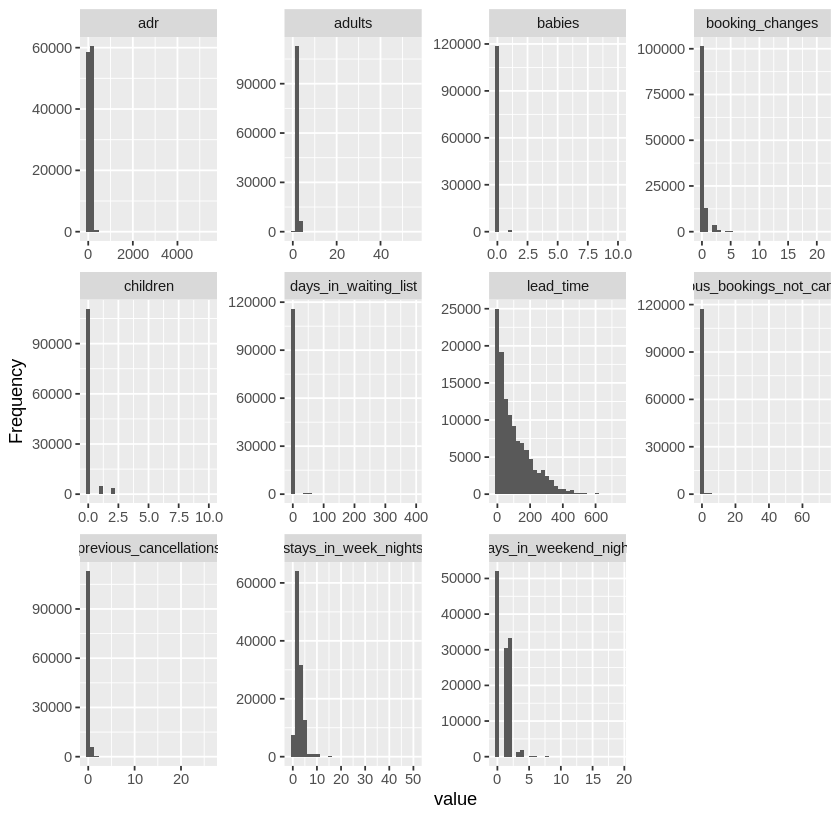

In [ ]:
plot_histogram(df)

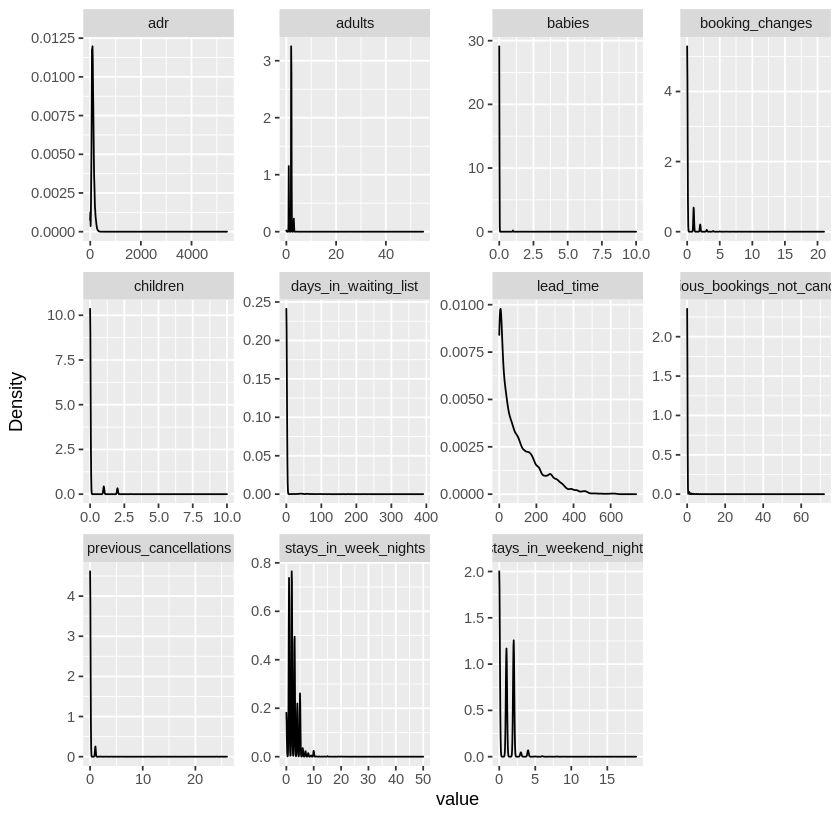

In [ ]:
plot_density(df)

앞서 생각했던 변수 말고 대부분 변수에 아웃라이어 존재하는 것 같다

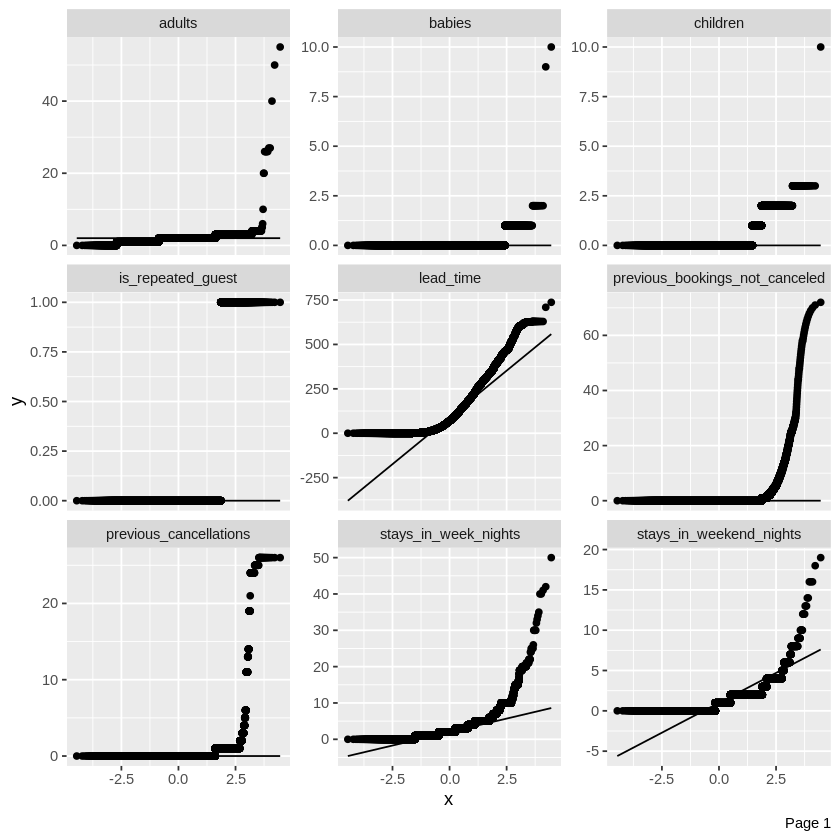

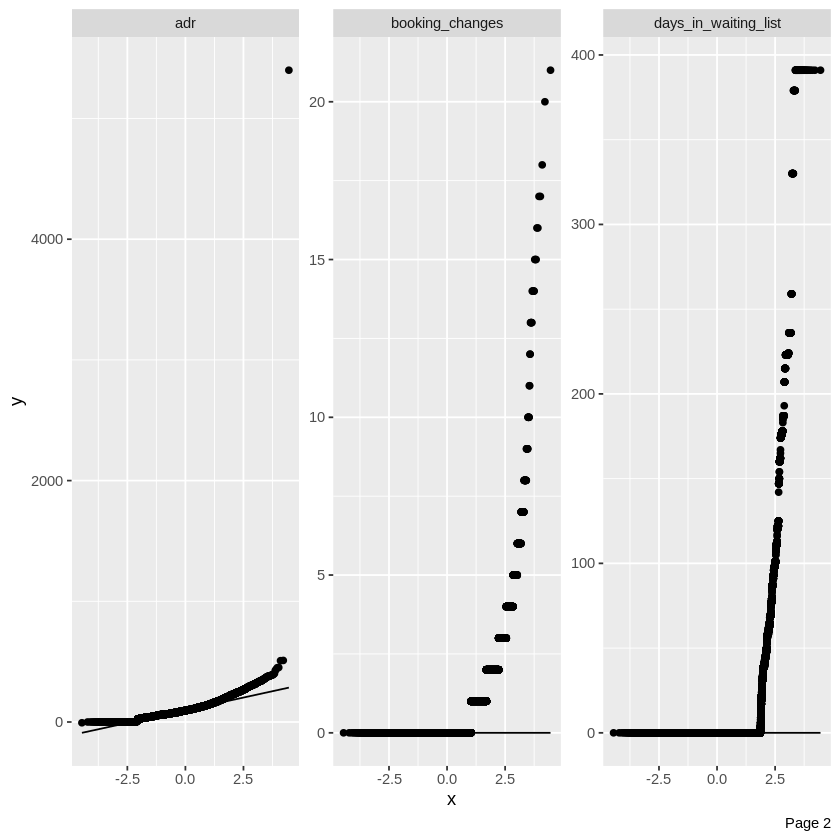

In [ ]:
plot_qq(na.omit(df))

- discrete 피처를 제외하고 
- adr(가격관련된거)는 아웃라이어 제거하면 정규성 만족할 것 같음
- 시간 관련된것도 만족할듯함

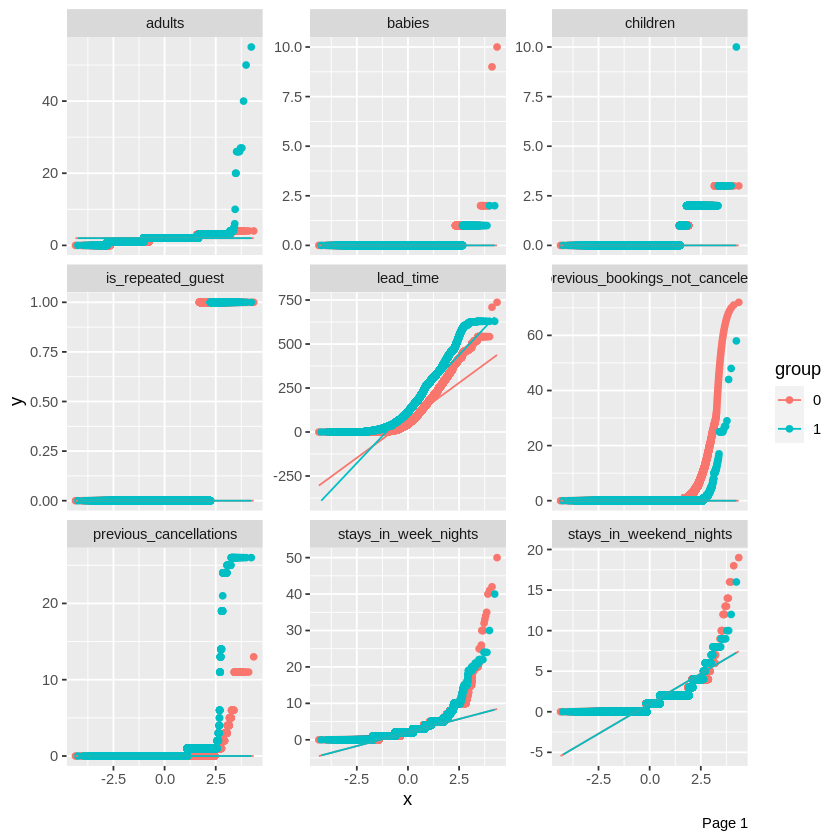

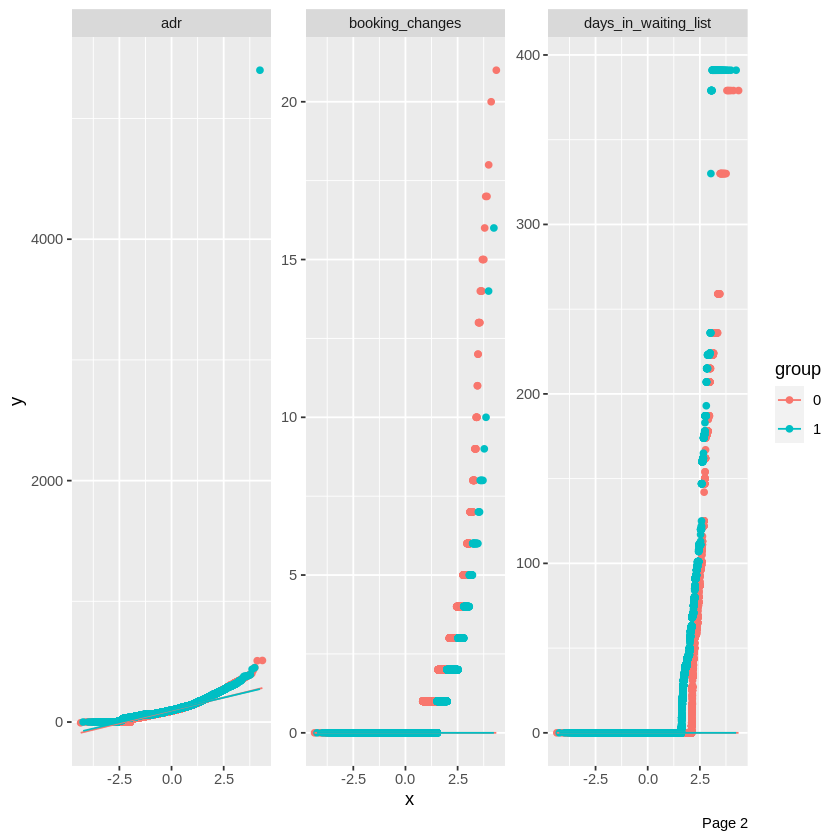

In [ ]:
plot_qq(na.omit(df), by="is_canceled")

1. 어른 뿐만 아니라 아기와 어린이도 포텐셜 아웃라이어가 존재하는 것 같다
2. 예약 이후 호텔 이용까지의 기간의 median은 취소 안한경우가 더 높았다 이건 좀 신기
3. 예전에 취소하면-> 취소하고, 취소 안하면 -> 취소 안함 이건 좀 매우 당연
4. 주중 주말 포함 투숙 기간이 긴 경우 많이 취소함

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”


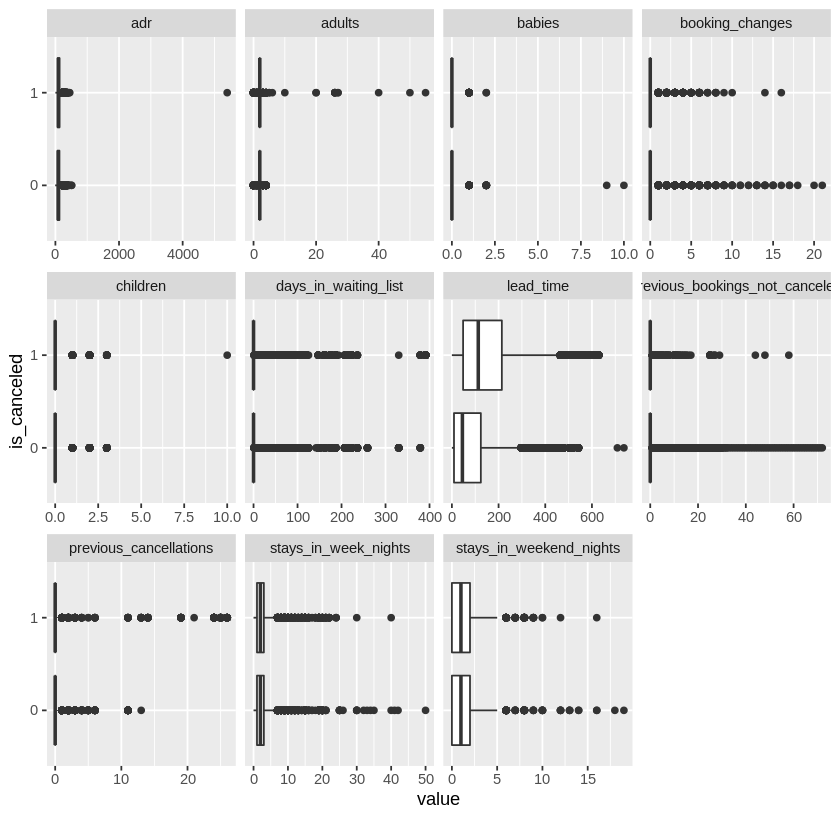

In [ ]:
plot_boxplot(df, by = "is_canceled")

1. lead_time은 타겟에 영향을 준다
2. 다른 피처는 아웃라이어 때문에 눈에 띄지 않는다 

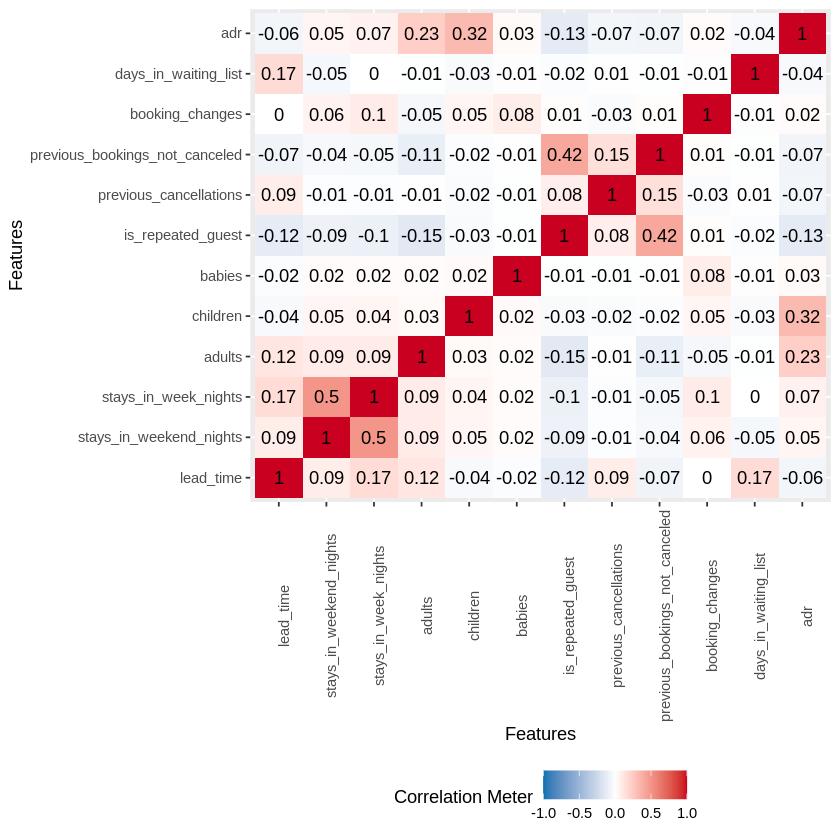

In [ ]:
df %>% select_if(is.numeric) -> df_numeric
plot_correlation(na.omit(df_numeric))

의미있는 상관관계는 나타나지 않았음
아웃라이어 때문일 수도

# 3. 전처리

1) 임퓨테이션
- 최빈값으로 대체

In [ ]:
mode= function(x){
  table(x) %>% which.max() %>% names
}

In [ ]:
df$children<-ifelse(is.na(df$children), mode(df$children),  df$children )

In [ ]:
is.na(df) %>% sum

[1] 0

In [ ]:
#table(df$children) %>% which.max()   # 0:1
#table(df$children) %>% which.min()    # 10: 5  -> 즉 , 값: 인덱스
#table(df$children) %>% which.min()  %>% str
  #> Named int 5
  #> - attr(*, "names")= chr "10"  # namse로 인덱스의 값을 반환함을 확인

#table(df$children) %>% which.min() %>% names

[1] "10"

In [ ]:
#최빈값 함수
#function(x){
#  names(which.max(table(x)))  # table로 변경
##  }
#내가한거(맥스값 찾는 거였음)
#df[which.max(df$children),"children"]

In [ ]:

#df$children<-ifelse(is.na(df$children), df[which.max(df$children),"children"],  df$children )

In [ ]:
sum(is.na(df)) # 확인

[1] 0

3) 범주형피처

- one-hot encoding (dummy) -> 이진클래스(hotel_type, is_repeated_guest)
- label encoding -> 나머지 (meal9, 룸관련 두개13,14)


In [ ]:
#라벨인코딩
lb_encoder = LabelEncoder$new() #라벨인코더 

for (j in c(9,13:14)){
  df[,j]<- lb_encoder$fit_transform(df[,j])
} 

In [ ]:
#원핫인코딩
df<-dummy_cols( .data= df   , select_columns=c("hotel_type","is_repeated_guest") , remove_first_dummy=  FALSE, remove_selected_columns=TRUE )

2) 연속형피처
- 이상치가 보이므로 민맥스말고 표준화함

In [ ]:
#함수생성
standard_scale<- function(x){
  (x - mean(x)) / sd(x)
  }

In [ ]:
df %<>% mutate(across(where(is.numeric), ~ standard_scale(.x)))

In [ ]:
df%>%head(3) 

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,hotel_type_City Hotel,hotel_type_Resort Hotel,is_repeated_guest_0,is_repeated_guest_1
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,2.2270418,-0.9288865,-1.3102344,0.2478962,-0.2588389,-0.08157892,-0.5200661,-0.1031791,-0.09155438,0.7190480,0.4873113,4.2600831,-0.131923,-2.0150298,-1.407218,1.407218,0.1815596,-0.1815596
2,0,5.9233599,-0.9288865,-1.3102344,0.2478962,-0.2588389,-0.08157892,-0.5200661,-0.1031791,-0.09155438,0.7190480,0.4873113,5.7931070,-0.131923,-2.0150298,-1.407218,1.407218,0.1815596,-0.1815596
3,0,-0.9078103,-0.9288865,-0.7862039,-1.4784413,-0.2588389,-0.08157892,-0.5200661,-0.1031791,-0.09155438,-0.6056002,0.4873113,-0.3389884,-0.131923,-0.5309331,-1.407218,1.407218,0.1815596,-0.1815596


In [ ]:
summary(df)

 is_canceled   lead_time       stays_in_weekend_nights stays_in_week_nights
 0:75166     Min.   :-0.9733   Min.   :-0.9289         Min.   :-1.3102     
 1:44224     1st Qu.:-0.8049   1st Qu.:-0.9289         1st Qu.:-0.7862     
             Median :-0.3276   Median : 0.0725         Median :-0.2622     
             Mean   : 0.0000   Mean   : 0.0000         Mean   : 0.0000     
             3rd Qu.: 0.5239   3rd Qu.: 1.0739         3rd Qu.: 0.2619     
             Max.   : 5.9234   Max.   :18.0975         Max.   :24.8913     
     adults           children           babies               meal        
 Min.   :-3.2048   Min.   :-0.2588   Min.   : -0.08158   Min.   :-0.5201  
 1st Qu.: 0.2479   1st Qu.:-0.2588   1st Qu.: -0.08158   1st Qu.:-0.5201  
 Median : 0.2479   Median :-0.2588   Median : -0.08158   Median :-0.5201  
 Mean   : 0.0000   Mean   : 0.0000   Mean   :  0.00000   Mean   : 0.0000  
 3rd Qu.: 0.2479   3rd Qu.:-0.2588   3rd Qu.: -0.08158   3rd Qu.:-0.5201  
 Max.   :91.7438  

In [ ]:
#앞서 랜포 돌렸을때 잘 안돼서 이름 먼저 바꾸고 다시 저장 
#colnames(df) <- tolower(colnames(df))
#df<-rename(df,   c("hotel_type_city"="hotel_type_city hotel" ,  "hotel_type_resort"="hotel_type_resort hotel"))
#write.csv(df, "hotel_fi.csv", row.names=FALSE)

#4. 모델링


## 4.1 SVM
1. 이상치가 존재하고 2. 피처들을 스케일링 했으므로 <br>
SVM모형을 선택한다 <br>
단점 시간비용

1) 트레인 테스트 스플릿

In [ ]:
set.seed(2022)
ind<-sample(1:nrow(df), nrow(df)*0.7, replace=FALSE)
train<-df[ind,]
test<-df[-ind,]

2) 피팅

In [ ]:
fit=ksvm(is_canceled~., data=train, kernel="rbfdot") #1. 디폴트 커널
fit

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.0725244826907555 

Number of Support Vectors : 47852 

Objective Function Value : -45513.58 
Training error : 0.255633 

Training error : 0.255633 

3) 파라미터 튜닝

In [ ]:
#cost1=c(10^(-1:1),5)
#acc=sapply(cost1, function(x){ 
#  set.seed(2022)
#fit=ksvm(is_canceled~. , train, kernel="rbfdot", C=x)    
#  pred=predict(fit, test)
#  agr=ifelse(pred==test[,1], 1, 0)
#  acc=sum(agr)/nrow(test)
#  
#  return(acc)
#})

In [ ]:
fit_2=ksvm(is_canceled~., data=train, kernel="rbfdot", C=0.1)
fit_2

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 0.1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.0723037940854717 

Number of Support Vectors : 50437 

Objective Function Value : -4837.179 
Training error : 0.271547 

Training error : 0.271547 

In [ ]:
fit_3=ksvm(is_canceled~., data=train, kernel="rbfdot", C=5)
fit_3

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.0723037940854717 

Number of Support Vectors : 46730 

Objective Function Value : -218781.1 
Training error : 0.245187 

Training error : 0.245187<br>
- 즉, 코스트 값이 5>1>0.1 순으로 에러가 줄어드는걸 발견

In [ ]:
#그래서 5보다 큰걸로 3개만 넣고 돌려봄
#c=seq(6,10, 2)
#esvm<-tune.svm(is_canseled~., data=train, gamma=10^(-2:-1), cost=c)$best.model
#느려서 생략

In [ ]:
fit_4=ksvm(is_canceled~., data=train, kernel="rbfdot", C=10)
fit_4

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 10 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.0725244826907555 

Number of Support Vectors : 46341 

Objective Function Value : -430344.5 
Training error : 0.240425 

Training error : 0.240197 
시간이 없으니 그냥 적합
- 최종모형: C = 10 , gamma=0.07

4) 평가

In [ ]:
pred_svm=predict(fit_4, test[,-1])

In [ ]:
confusionMatrix(pred_svm, test[,1], positive = "1")   #Accuracy : 0.7473

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 20619  7175
         1  1877  6146
                                          
               Accuracy : 0.7473          
                 95% CI : (0.7427, 0.7518)
    No Information Rate : 0.6281          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4113          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.4614          
            Specificity : 0.9166          
         Pos Pred Value : 0.7660          
         Neg Pred Value : 0.7419          
             Prevalence : 0.3719          
         Detection Rate : 0.1716          
   Detection Prevalence : 0.2240          
      Balanced Accuracy : 0.6890          
                                          
       'Positive' Class : 1               
                  

In [ ]:
roc_svm=roc(  as.numeric(pred_svm), as.numeric(test[,1]))

Setting levels: control = 1, case = 2

Setting direction: controls < cases



In [ ]:
auc(roc_svm)

Area under the curve: 0.7539

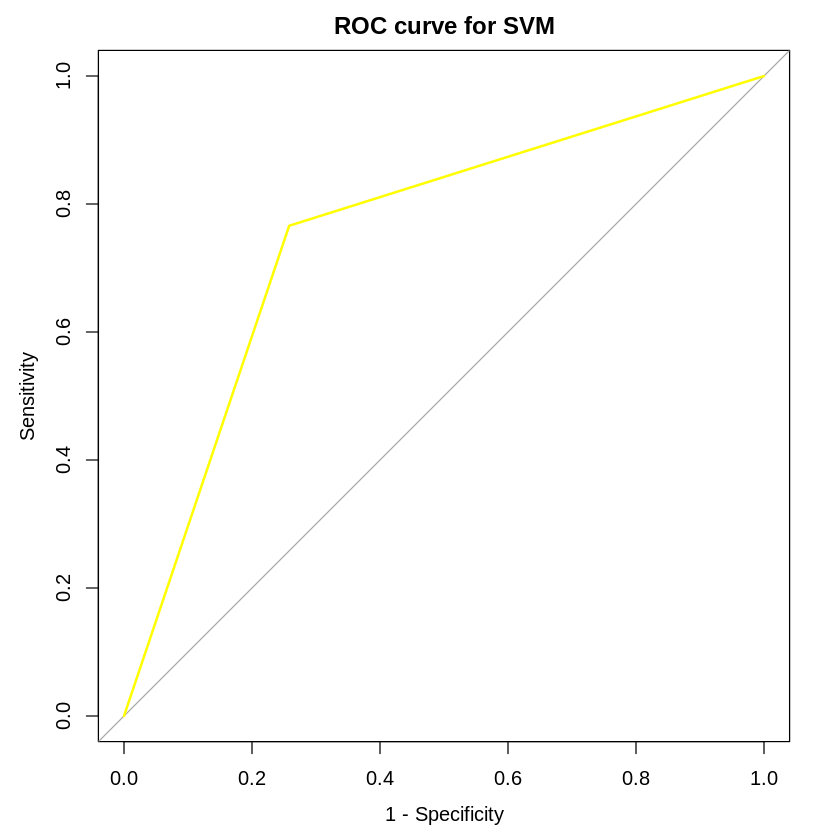

In [ ]:
plot.roc(roc_svm, main="ROC curve for SVM", col="yellow", legacy.axes=T)

## 4-2. RandomForest 

### 4-2-1. randomForest 패키지 활용(내가한거)

In [ ]:
#생각보다 낮게나와서 랜포 돌림
install.packages("randomForest"); library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
rf<-randomForest(is_canceled ~. ,  data=train)
rf

ERROR: ignored

Error in eval(predvars, data, env): object 'hotel_type_City Hotel' not found
Traceback:

In [ ]:
#그래서 변수명 바꾸기로함
colnames(train) <- tolower(colnames(train))

In [ ]:
colnames(train)  #원핫인코딩 반환할때 생긴 오류같음 아니면 옵션 있을수도 ,,

[1] "is_canceled"                    "lead_time"                     
 [3] "stays_in_weekend_nights"        "stays_in_week_nights"          
 [5] "adults"                         "children"                      
 [7] "babies"                         "meal"                          
 [9] "previous_cancellations"         "previous_bookings_not_canceled"
[11] "reserved_room_type"             "assigned_room_type"            
[13] "booking_changes"                "days_in_waiting_list"          
[15] "adr"                            "hotel_type_city hotel"         
[17] "hotel_type_resort hotel"        "is_repeated_guest_0"           
[19] "is_repeated_guest_1"

In [ ]:
# rename_with(train, ~ tolower(gsub(".", "_", .x, fixed = TRUE)))# 안됨
train<-rename(train,   c("hotel_type_city"="hotel_type_city hotel" ,  "hotel_type_resort"="hotel_type_resort hotel"))

In [ ]:
rf<-randomForest(is_canceled ~. ,  data=train)
rf


Call:
 randomForest(formula = is_canceled ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 21.37%
Confusion matrix:
      0     1 class.error
0 48243  4427  0.08405164
1 13431 17472  0.43461800

[1] 487

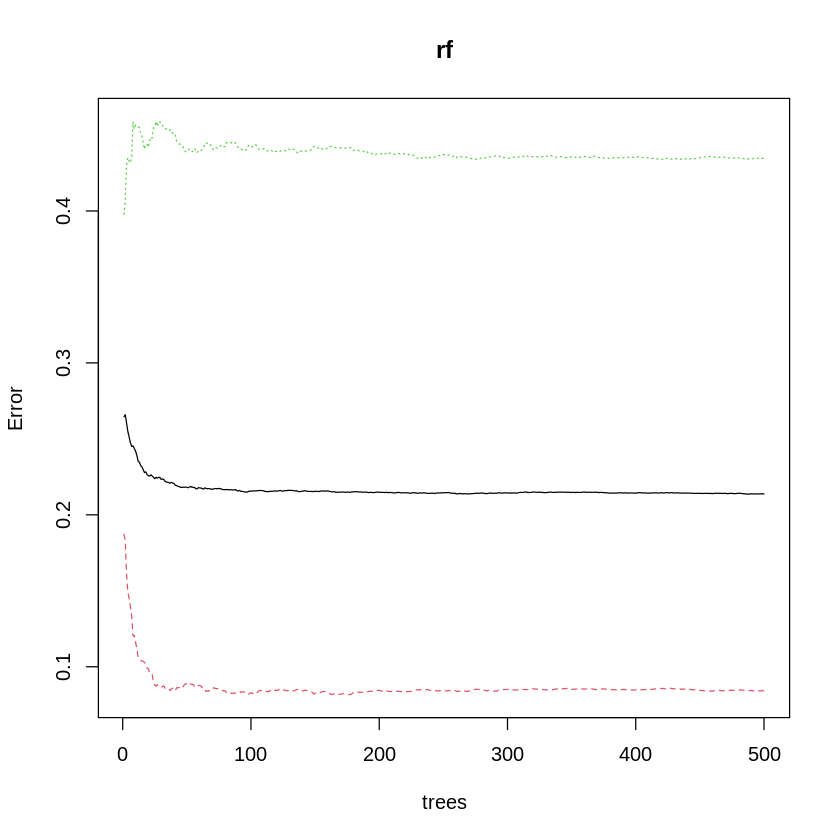

In [ ]:
##트리 수에 따른 오차
plot(rf)
#최소 오차율 위치로 최적 트리수 찾기
which.min(rf$err.rate[,1])

In [ ]:
#파라미터 최적화
rf2<-randomForest(is_canceled ~. ,  train , ntree= 487 )
print(rf2)


Call:
 randomForest(formula = is_canceled ~ ., data = train, ntree = 487) 
               Type of random forest: classification
                     Number of trees: 487
No. of variables tried at each split: 4

        OOB estimate of  error rate: 21.33%
Confusion matrix:
      0     1 class.error
0 48076  4594  0.08722233
1 13231 17672  0.42814613


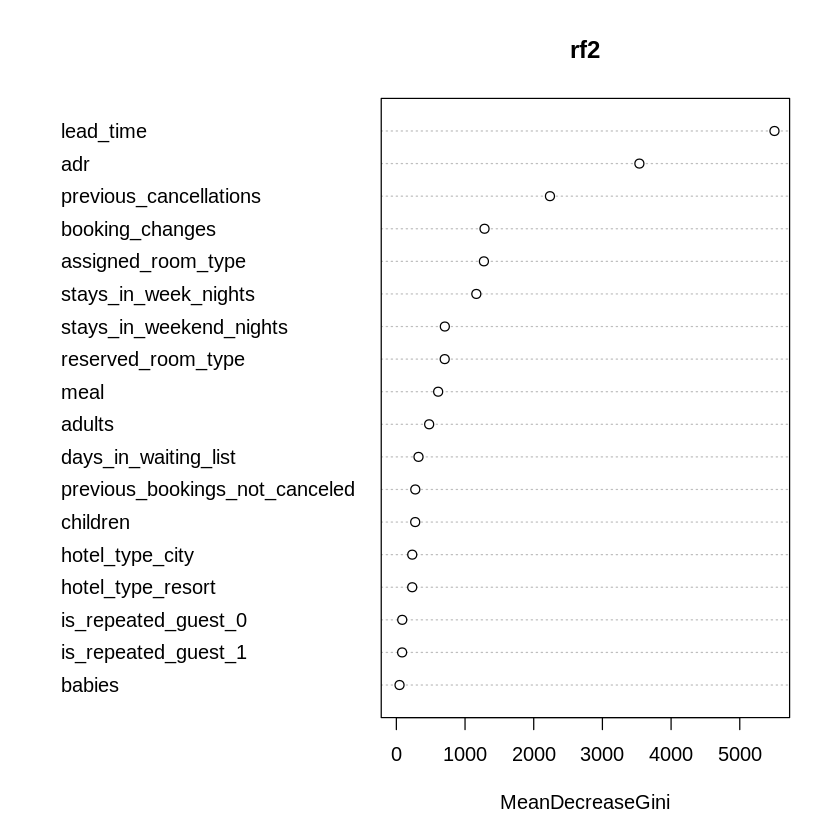

In [ ]:
#변수 중요도
varImpPlot(rf2)

1. SVM은 해석하기에 단점이 있었음
2. EDA에서 예상한 것처럼 `예약 이후 호텔 이용까지의 기간(lead_time)`이 예약 취소 여부에 제일 중요함
3. 그 다음 `평균 가격(adr)`, `취소 횟수(previous_cansellations)`
4. 이전 투숙 여부랑 호텔 타입 여부는 비교적 중요도 낮음
5. 아기, 어린이 보단 어른이 더 중요함

In [ ]:
test<-rename_with(test,  ~ tolower(gsub(".", "_", .x, fixed = TRUE)))

In [ ]:
test<-rename(test,   c("hotel_type_city"="hotel_type_city hotel" ,  "hotel_type_resort"="hotel_type_resort hotel"))

In [ ]:
pred_rf=predict(rf2, test[,-1])
confusionMatrix(pred_rf, test[,1], positive = "1")  #  Accuracy : 0.7869  

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 20603  5739
         1  1893  7582
                                          
               Accuracy : 0.7869          
                 95% CI : (0.7826, 0.7911)
    No Information Rate : 0.6281          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5154          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5692          
            Specificity : 0.9159          
         Pos Pred Value : 0.8002          
         Neg Pred Value : 0.7821          
             Prevalence : 0.3719          
         Detection Rate : 0.2117          
   Detection Prevalence : 0.2645          
      Balanced Accuracy : 0.7425          
                                          
       'Positive' Class : 1               
                  

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.7912

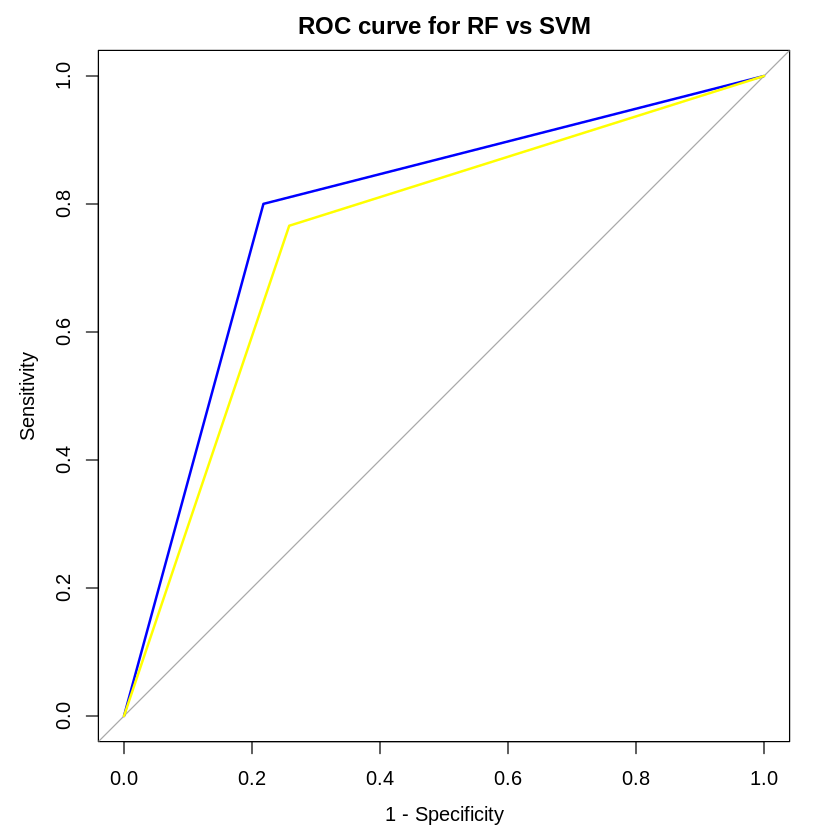

In [ ]:
roc_rf=roc(  as.numeric(pred_rf), as.numeric(test[,1]))
auc(roc_rf)  #0.7911
plot.roc(roc_rf, main="ROC curve for RF vs SVM", col="blue", legacy.axes=T)  
plot.roc(roc_svm, col="yellow", add=TRUE)

1. rf의 auc값은 `0.7911`로써 svm의 auc값이 0.7539인 것과 비교해서 더 높음

### 4-2-2. ranger 패키지 활용


[예제] https://cran.r-project.org/web/packages/ranger/ranger.pdf

In [2]:
install.packages("ranger")
install.packages(c("survival", "GenABEL"))
p_load("ranger","survival", "GenABEL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppEigen’


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘GenABEL’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


ERROR: ignored

In [1]:
## Classification forest with default settings
ranger(Species ~ ., data = iris)

ERROR: ignored

In [ ]:
## Classification forest with default settings
ranger(Species ~ ., data = iris)
## Prediction
train.idx <- sample(nrow(iris), 2/3 * nrow(iris))
iris.train <- iris[train.idx, ]
iris.test <- iris[-train.idx, ]
rg.iris <- ranger(Species ~ ., data = iris.train)
pred.iris <- predict(rg.iris, data = iris.test)
table(iris.test$Species, pred.iris$predictions)
## Quantile regression forest
rf <- ranger(mpg ~ ., mtcars[1:26, ], quantreg = TRUE)
pred <- predict(rf, mtcars[27:32, ], type = "quantiles")
pred$predictions
## Variable importance
rg.iris <- ranger(Species ~ ., data = iris, importance = "impurity")
rg.iris$variable.importance
## Survival forest
require(survival)
rg.veteran <- ranger(Surv(time, status) ~ ., data = veteran)
plot(rg.veteran$unique.death.times, rg.veteran$survival[1,])
## Alternative interfaces (same results)
ranger(dependent.variable.name = "Species", data = iris)
ranger(y = iris[, 5], x = iris[, -5])
## Not run:
22 timepoints.ranger
## Use GenABEL interface to read Plink data into R and grow a classification forest
## The ped and map files are not included
library(GenABEL)
convert.snp.ped("data.ped", "data.map", "data.raw")
dat.gwaa <- load.gwaa.data("data.pheno", "data.raw")
phdata(dat.gwaa)$trait <- factor(phdata(dat.gwaa)$trait)
ranger(trait ~ ., data = dat.gwaa)
## End(Not run)

[드래프트]

# 5. 확률로 저장

In [ ]:
#pred_prop=predict(rf2, test[,-1], type="response") 안됨

In [ ]:
str(pred_prop)
#?predict

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "names")= chr [1:35817] "1" "3" "7" "10" ...


In [ ]:
#뉴메릭으로바꾸고
df $ is_canceled %<>% as.numeric()

In [ ]:
colnames(df)<-tolower(df%>%colnames())

In [ ]:
df<-  rename(df,   c("hotel_type_city"="hotel_type_city hotel" ,  "hotel_type_resort"="hotel_type_resort hotel"))

In [ ]:
set.seed(2022)
ind<-sample(1:nrow(df), nrow(df)*0.7, replace=FALSE)
train<-df[ind,]
test<-df[-ind,]

In [ ]:
str(train)

In [ ]:
rf2<-randomForest(is_canceled ~. ,  train , ntree= 487 )

In [ ]:

#@장연훈선생님토드
require(ranger)

rf_model <- ranger(is_canceled ~ .,
data = train,
importance = 'impurity',
max.depth = 250,
num.trees = 200,
classification = T,
probability = T)

rf_pred <- predict(rf_model, test, type='response')
rf_pred %>% class()
rf_pred$predictions %>% head()
test$rf_pred<- ifelse(rf_pred$predictions[,2]>0.5,1,0)
confusionMatrix(as.factor(test$rf_pred),as.factor(test$is_canceled),
positive = '1')
roc_rf <- roc(response = test$is_canceled,
ci=T, boot.n=10000,
predictor = rf_pred$predictions[,2])
plot.roc(roc_rf, col='red',
legacy.axes = T,
asp = NA,
print.auc=T,
print.auc.x = 0.3)

rf_model$variable.importance
rf_model_fi <- data.frame(rf_model$variable.importance)
rf_model_fi$features <- rownames(rf_model_fi)

colnames(rf_model_fi) <- c('importance','features')

ggplot(rf_model_fi, aes(x=reorder(features,importance), y=importance,fill=importance))+
geom_bar(stat="identity", position="dodge")+ coord_flip()+
ylab("Variable Importance")+
xlab("")+
ggtitle("Information Value Summary")+
guides(fill=F)+
scale_fill_gradient(low="white", high="blue") +
theme_bw()
ranger::importance(rf_model)